In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

In [14]:
print(red_wine.shape)
print(white_wine.shape)
print(wine_data.shape)
print(wine_data.head())

(1599, 12)
(4898, 12)
(6497, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.

Estadísticas descriptivas básicas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.0

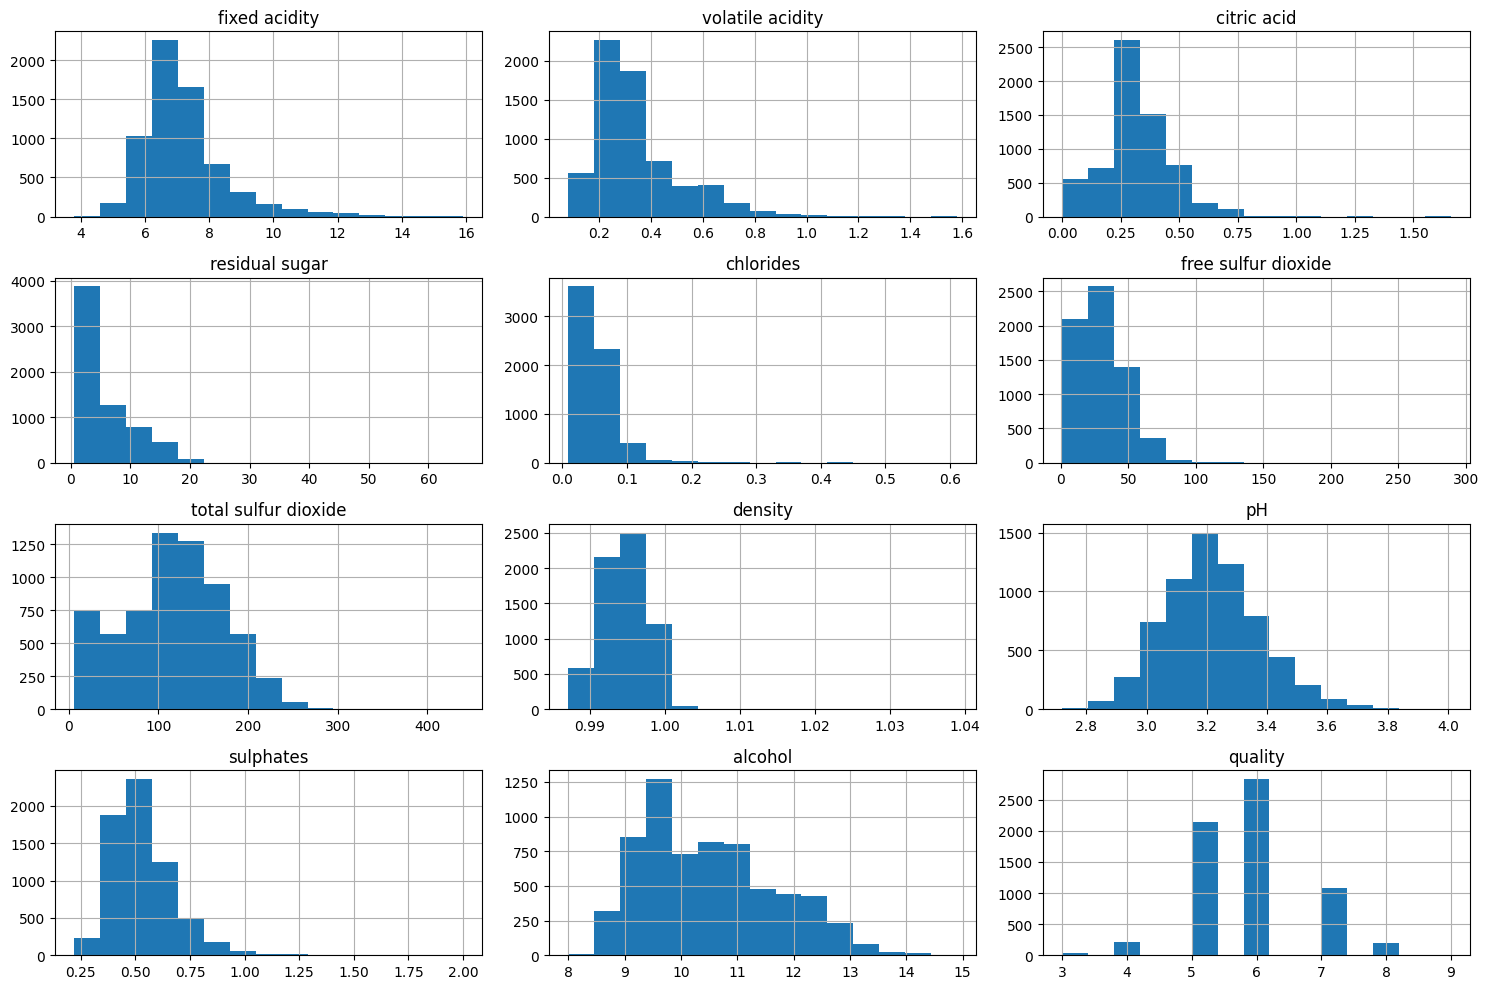

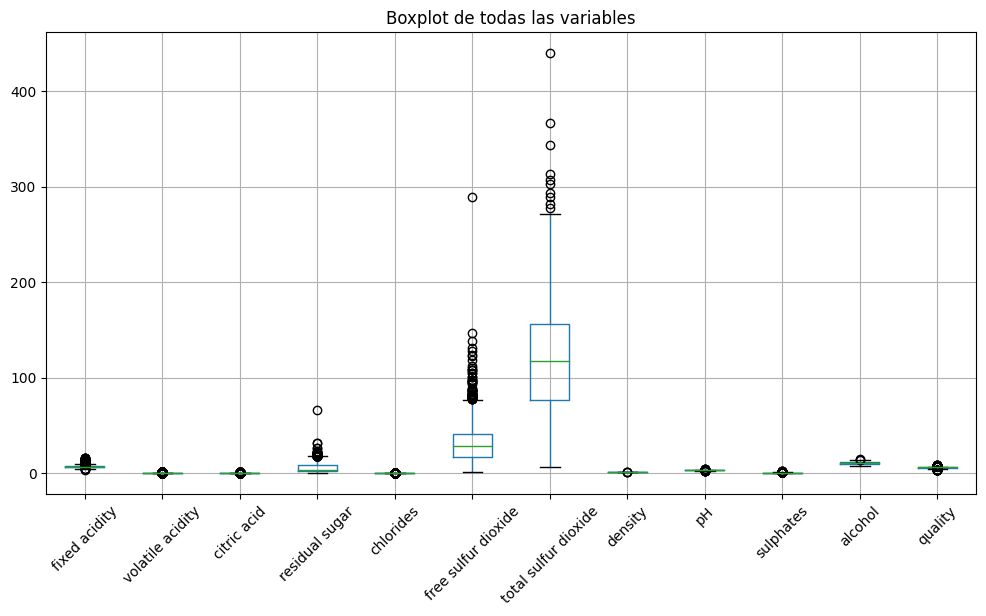

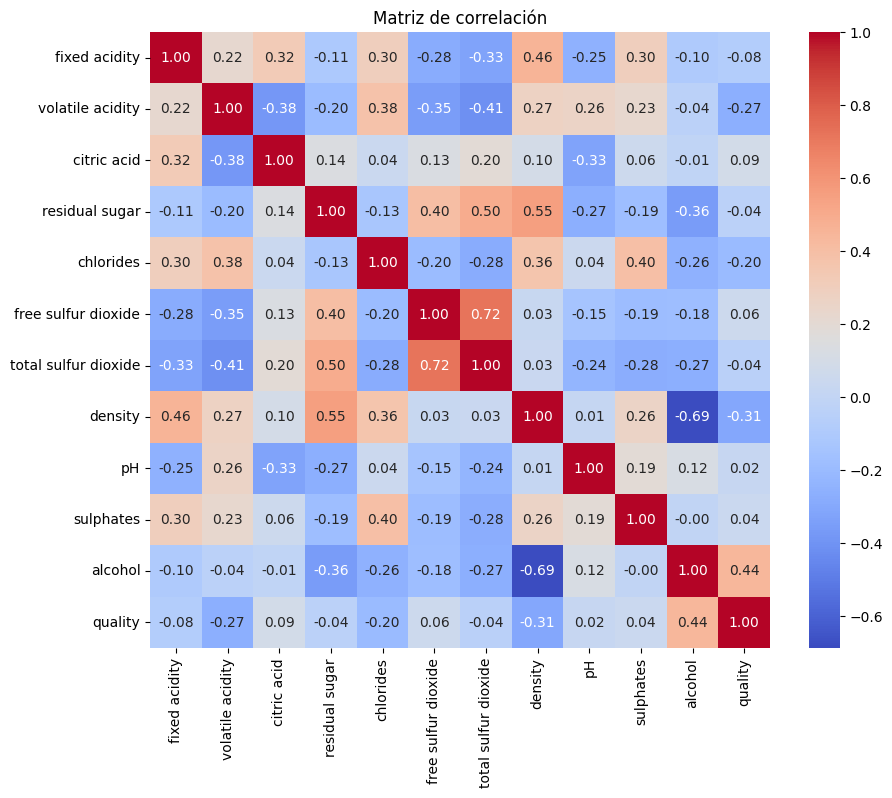

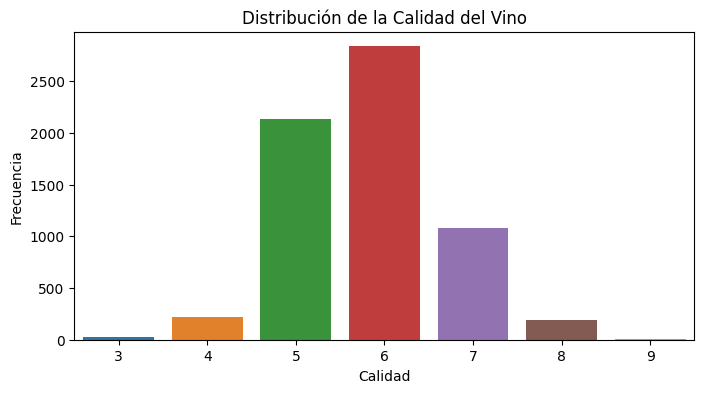

In [21]:
print("Estadísticas descriptivas básicas:")
print(wine_data.describe())

# Histogramas para todas las variables
wine_data.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

# Boxplots 
plt.figure(figsize=(12, 6))
wine_data.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot de todas las variables')
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Distribución de la calidad del vino
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
print("Valores faltantes")
print(wine_data.isnull().sum())

Valores faltantes
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler
features = wine_data.drop('quality', axis=1)
target = wine_data['quality']

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

wine_data_scaled = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

print(wine_data_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  quality  
0 -0.915464        5  
1 -0.58006

In [32]:
from sklearn.model_selection import train_test_split

# Separar las características y la variable objetivo
X = wine_data_scaled.drop('quality', axis=1)
y = wine_data_scaled['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba con una proporción 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificación de las dimensiones de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (5197, 11)
Tamaño del conjunto de prueba: (1300, 11)


### Regresión logística

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('pca', PCA(n_components=10)),
    ('logistic', LogisticRegression(random_state=1, solver='liblinear', max_iter=10000))
])

param_grid_lr = {
    'logistic__C': [0.01, 0.1, 1, 10],
    'logistic__class_weight': [None, 'balanced'] 
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=3, scoring='accuracy', verbose=1) 
grid_lr.fit(X_train, y_train)

print("Mejores parámetros:", grid_lr.best_params_)
print("Mejor puntuación de cross-validation:", grid_lr.best_score_)

y_pred_lr = grid_lr.predict(X_test)
print("\nReporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_lr, zero_division=1)) 


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores parámetros: {'logistic__C': 1, 'logistic__class_weight': None}
Mejor puntuación de cross-validation: 0.5462769976638784

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       1.00      0.00      0.00        43
           5       0.53      0.62      0.57       402
           6       0.52      0.69      0.59       597
           7       0.48      0.09      0.16       215
           8       1.00      0.00      0.00        36
           9       1.00      0.00      0.00         1

    accuracy                           0.52      1300
   macro avg       0.79      0.22      0.23      1300
weighted avg       0.55      0.52      0.48      1300



### KNN


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

max_pca_components = min(X_train.shape[0], X_train.shape[1])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=max_pca_components // 2)),  
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'pca__n_components': [max_pca_components // 4, max_pca_components // 3, max_pca_components // 2],
    'knn__n_neighbors': [3, 5, 7],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=3, scoring='accuracy', verbose=1, error_score='raise')

grid_knn.fit(X_train, y_train)

print("Mejores parámetros para KNN:", grid_knn.best_params_)
print("Mejor puntuación de cross-validation para KNN:", grid_knn.best_score_)

y_pred_knn = grid_knn.predict(X_test)
print("\nReporte de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores parámetros para KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'pca__n_components': 5}
Mejor puntuación de cross-validation para KNN: 0.517800101014274

Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           3       0.50      0.17      0.25         6
           4       0.16      0.09      0.12        43
           5       0.53      0.65      0.58       402
           6       0.57      0.59      0.58       597
           7       0.49      0.34      0.40       215
           8       0.40      0.11      0.17        36
           9       1.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.52      0.28      0.30      1300
weighted avg       0.53      0.54      0.52      1300



In [43]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)), 
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [100, 200], 
    'rf__max_depth': [None, 20],  
    'rf__min_samples_split': [5] 
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Mejores parámetros para Random Forest:", grid_rf.best_params_)
print("Mejor puntuación de cross-validation para Random Forest:", grid_rf.best_score_)

y_pred_rf = grid_rf.predict(X_test)
print("\nReporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=1))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores parámetros para Random Forest: {'rf__max_depth': 20, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Mejor puntuación de cross-validation para Random Forest: 0.603428244106279

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       0.67      0.05      0.09        43
           5       0.66      0.72      0.69       402
           6       0.67      0.75      0.70       597
           7       0.65      0.52      0.57       215
           8       0.75      0.33      0.46        36
           9       1.00      0.00      0.00         1

    accuracy                           0.66      1300
   macro avg       0.77      0.34      0.36      1300
weighted avg       0.66      0.66      0.65      1300



## Validación cruzada

### Regresión logística

In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_lr.best_estimator_, X, y, cv=5, scoring='accuracy') 

print("Accuracy scores de validación cruzada:", cv_scores)
print("Media de accuracy:", cv_scores.mean())
print("Desviación estándar de accuracy:", cv_scores.std())


Accuracy scores de validación cruzada: [0.40461538 0.46153846 0.51424172 0.55350269 0.53656659]
Media de accuracy: 0.49409297092437965
Desviación estándar de accuracy: 0.05441604603694865


### KNN

In [46]:
cv_scores_knn = cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='accuracy')

print("Accuracy scores de validación cruzada para KNN:", cv_scores_knn)
print("Media de accuracy para KNN:", cv_scores_knn.mean())
print("Desviación estándar de accuracy para KNN:", cv_scores_knn.std())


Accuracy scores de validación cruzada para KNN: [0.37076923 0.41538462 0.43187067 0.44803695 0.45727483]
Media de accuracy para KNN: 0.42466725883815953
Desviación estándar de accuracy para KNN: 0.030503934339024055


### Random Forest

In [48]:
cv_scores_rf = cross_val_score(grid_rf.best_estimator_, X, y, cv=5, scoring='accuracy')

print("Accuracy scores de validación cruzada para Random Forest:", cv_scores_rf)
print("Media de accuracy para Random Forest:", cv_scores_rf.mean())
print("Desviación estándar de accuracy para Random Forest:", cv_scores_rf.std())

Accuracy scores de validación cruzada para Random Forest: [0.37846154 0.44307692 0.47959969 0.48267898 0.46882217]
Media de accuracy para Random Forest: 0.45052786166873926
Desviación estándar de accuracy para Random Forest: 0.03863319597489457


### Comparación de resultados

##### Regresión Logística
* Media de Accuracy: 0.4941
* Desviación Estándar de Accuracy: 0.0544

##### KNN
* Media de Accuracy: 0.4247
* Desviación Estándar de Accuracy: 0.0305

##### Random Forest
* Media de Accuracy: 0.4505
* Desviación Estándar de Accuracy: 0.0386

* Rendimiento General: La Regresión Logística tiene la media de accuracy más alta entre los tres modelos, lo que sugiere que es más efectiva en general para este conjunto de datos. Su desviación estándar también es relativamente más alta, lo que indica variabilidad en su rendimiento a través de diferentes subconjuntos de datos. Sin embargo, esta variabilidad no es sustancialmente mayor en comparación con la de Random Forest.

* Consistencia del Modelo: El KNN tiene la menor desviación estándar, lo que indica que su rendimiento es más consistente a través de diferentes subconjuntos del conjunto de datos. Sin embargo, también tiene la menor precisión media, lo que podría indicar que, aunque es consistente, tiende a tener un rendimiento general más bajo.

* Compromiso entre Precisión y Consistencia: Random Forest tiene un rendimiento promedio en ambos aspectos, con una precisión media que está entre Regresión Logística y KNN y una variabilidad de rendimiento menor que la de Regresión Logística pero mayor que la de KNN

## Conclusiones

* Los resultados de los modelos indican variaciones significativas en el desempeño a través de la regresión logística, KNN y Random Forest. Observamos las siguientes características en cada modelo:

##### Regresión Logística:

* Mejor precisión de validación cruzada: 0.546
* La regresión logística muestra una precisión y un recall relativamente bajos en las clases minoritarias (3, 4, 8, 9), aunque logra buenos valores de precisión en algunas, su capacidad para detectar estas clases es mínima.
##### KNN:

* Mejor precisión de validación cruzada: 0.518
* El rendimiento de KNN es ligeramente inferior al de la regresión logística. Muestra una mejor distribución en el recall pero aún tiene dificultades con las clases minoritarias, similar a la regresión logística.
##### Random Forest:

* Mejor precisión de validación cruzada: 0.603
* Random Forest no solo supera a los otros modelos en precisión de validación cruzada, sino que también muestra un equilibrio más robusto entre precisión y recall, y mejor manejo de las clases minoritarias comparado con los otros modelos.

* Conclusión sobre el Mejor Modelo
* Random Forest es el modelo que funcionó mejor, basándonos en una combinación de la precisión más alta en validación cruzada y mejores puntajes de precisión y recall en la evaluación con el conjunto de prueba. Su capacidad para manejar eficazmente las características y sus interacciones más complejas, junto con un mejor balance entre las clases (como se observa en su desempeño en clases minoritarias), lo hacen el modelo más adecuado para este conjunto de datos.

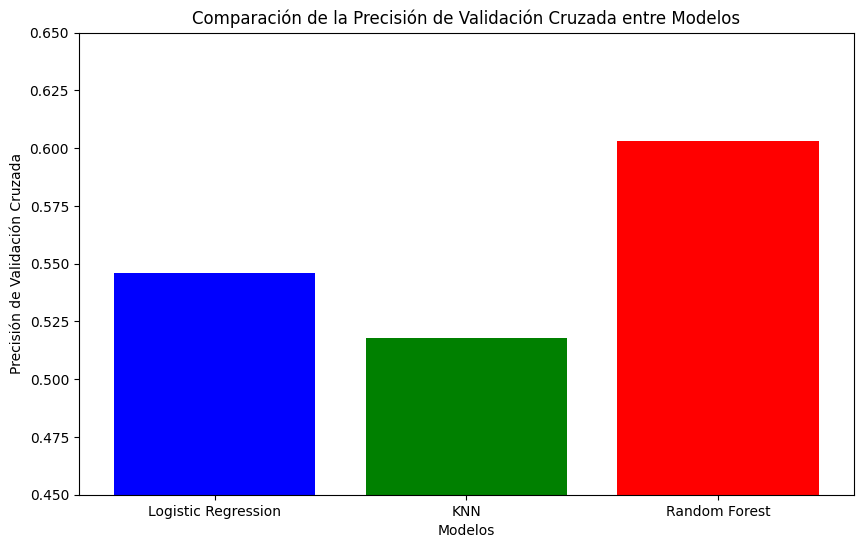

In [49]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
cv_scores = [0.546, 0.518, 0.603]

plt.figure(figsize=(10, 6))
plt.bar(model_names, cv_scores, color=['blue', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Comparación de la Precisión de Validación Cruzada entre Modelos')
plt.ylim(0.45, 0.65)  # Ajustar según sea necesario
plt.show()

Este gráfico ayuda a visualizar claramente cómo el Random Forest supera a los otros modelos en términos de precisión de validación cruzada.

#### Sugerencias para Mejoras o Pasos Futuros
* Optimización de Hiperparámetros: Aunque se realizó una búsqueda de cuadrícula, expandir el rango de hiperparámetros evaluados podría mejorar aún más el rendimiento.
* Exploración de Características: Realizar un análisis más profundo de la ingeniería de características para entender qué variables son más predictivas y cómo podrían ser transformadas o combinadas para mejorar el rendimiento del modelo.